In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

from keras import layers, optimizers, models
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
from IPython.display import Image, SVG
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
pd.options.mode.chained_assignment = None

from sklearn.svm import SVR
# from skrvm import RVR
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from matplotlib import pyplot as plt
from keras import backend as K
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.models import Model
from tensorflow.keras.optimizers import Adam,Adagrad
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import keras
import talos

In [3]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [4]:
train_data = pandas.read_csv("adult.data", encoding="UTF-8", header=None)
test_data = pandas.read_csv("adult.test", encoding="UTF-8", header=None, skiprows=1) 

test_data[14] = test_data[14].str.replace('.', '') 
train_data = train_data.replace(' ?', np.nan) 
test_data = test_data.replace(' ?', np.nan) 


train_data = train_data.dropna() # 去掉 missing value 的那筆資料，剩下 30162 筆
test_data = test_data.dropna() # 去掉 missing value 的那筆資料，剩下 15060 筆

cols = train_data.columns.tolist() # 把train_data的columns轉換成list
cols.insert(14, cols.pop(cols.index(3))) # 調換 12 跟 14 列

cols = test_data.columns.tolist() # 把test_data的columns轉換成list
cols.insert(14,cols.pop(cols.index(3))) # 調換 12 跟 14 列
# cols

train_data = train_data.loc[:,cols] # set剛剛重新定位的columns
# train_data
test_data = test_data.loc[:,cols] # set剛剛重新定義的columns
# test_data
train_data.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14] # 對train_data的cloumns重新命名，讓它能夠恢復名稱順序
# train_data
test_data.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14] # 對test_data的cloumns重新命名，讓它能夠恢復名稱順序
# test_data

In [5]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,11th
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Assoc-acdm
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,HS-grad
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,HS-grad
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,HS-grad


In [6]:
#資料 與 label 
labelencoder = LabelEncoder()
train_data2 = train_data.drop([14], axis=1)
train_data2 = train_data.drop([3], axis=1)
train_label = labelencoder.fit_transform(train_data[14])

test_label = pd.get_dummies(test_data.loc[:,14])
test_data2 = test_data.drop([14], axis=1)
test_data2 = test_data.drop([3], axis=1)
test_label = labelencoder.fit_transform(test_data[14])


# train_data2.shape,test_data.shape,train_label.min(),test_label.shape

In [7]:
train_label

array([ 9,  9, 11, ..., 11, 11, 11])

In [8]:
#使用 Label Encoding 把字串以數字取代
def transform_label(full_data):
    transform_needed = [False,
           True,
           False,
           True,
           True,
           True,
           True,
           True,
           False,
           False,
           False,
           True,
           True]


    result = np.zeros(shape=(full_data.shape[0], full_data.shape[1]), dtype=np.float32)

    for i in range(len(transform_needed)):
        if transform_needed[i]:
            tmp_data = full_data.iloc[:, i].tolist()
            encoder = LabelEncoder()
            encoder.fit(tmp_data)
            result[:, i] = encoder.transform(tmp_data)
        else:
            result[:, i] = full_data.iloc[:, i].tolist()
            
    return result

In [9]:
# 對 training data 和 testing data 進行 label encoding 編碼
transformed_train_data = transform_label(train_data2)
transformed_test_data = transform_label(test_data2)

In [10]:
train_data2

,0,1,2,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
2,38,Private,215646,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad
3,53,Private,234721,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,11th
4,28,Private,338409,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Assoc-acdm
32557,40,Private,154374,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,HS-grad
32558,58,Private,151910,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,HS-grad
32559,22,Private,201490,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,HS-grad


In [11]:
pd.DataFrame(transformed_train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,39.0,5.0,77516.0,4.0,0.0,1.0,4.0,1.0,2174.0,0.0,40.0,38.0,0.0,0.0
1,50.0,4.0,83311.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0,0.0,0.0
2,38.0,2.0,215646.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0,0.0,0.0
3,53.0,2.0,234721.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0,0.0,0.0
4,28.0,2.0,338409.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27.0,2.0,257302.0,2.0,12.0,5.0,4.0,0.0,0.0,0.0,38.0,38.0,0.0,0.0
30158,40.0,2.0,154374.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,40.0,38.0,1.0,0.0
30159,58.0,2.0,151910.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0,40.0,38.0,0.0,0.0
30160,22.0,2.0,201490.0,4.0,0.0,3.0,4.0,1.0,0.0,0.0,20.0,38.0,0.0,0.0


In [12]:
# Feature scaling : 將資料正規化
scaler = MinMaxScaler().fit(transformed_train_data)

transformed_train_data = scaler.transform(transformed_train_data)
transformed_test_data = scaler.transform(transformed_test_data)

# 拆分成輸入資料和答案
x_train = transformed_train_data[:, :12]
# y_train = transformed_train_data[:, 13]



x_test = transformed_test_data[:, :12]
# y_test = transformed_test_data[:, 13]

In [33]:
a_train = transformed_train_data[:, :1]
a_test = transformed_test_data[:, :1]

b_train = transformed_train_data[:, :2]
b_test = transformed_test_data[:, :2]

In [13]:
pd.DataFrame(transformed_train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.301370,0.833333,0.043338,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.95,0.0,0.0
1,0.452055,0.666667,0.047277,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.95,0.0,0.0
2,0.287671,0.333333,0.137244,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95,0.0,0.0
3,0.493151,0.333333,0.150212,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.95,0.0,0.0
4,0.150685,0.333333,0.220703,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.10,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.333333,0.165563,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.95,0.0,0.0
30158,0.315068,0.333333,0.095589,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0,0.0
30159,0.561644,0.333333,0.093914,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.95,0.0,0.0
30160,0.068493,0.333333,0.127620,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.95,0.0,0.0


In [14]:
print(x_train)
print(train_label.max())
print(x_test.shape)
print(test_label.shape)
transformed_train_data[1]

[[0.30136985 0.8333334  0.04333771 ... 0.         0.39795917 0.95      ]
 [0.4520548  0.6666667  0.04727738 ... 0.         0.12244897 0.95      ]
 [0.2876712  0.33333334 0.13724391 ... 0.         0.39795917 0.95      ]
 ...
 [0.56164384 0.33333334 0.09391367 ... 0.         0.39795917 0.95      ]
 [0.06849313 0.33333334 0.1276201  ... 0.         0.19387755 0.95      ]
 [0.47945207 0.5        0.18638337 ... 0.         0.39795917 0.95      ]]
15
(15060, 12)
(15060,)


array([0.4520548 , 0.6666667 , 0.04727738, 0.33333334, 0.23076925,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.12244897, 0.95      , 0.        , 0.        ], dtype=float32)

In [34]:
print(a_train)
print(train_label.max())
print(a_test.shape)
print(test_label.shape)
transformed_train_data[2]

[[0.30136985]
 [0.4520548 ]
 [0.2876712 ]
 ...
 [0.56164384]
 [0.06849313]
 [0.47945207]]
15
(15060, 1)
(15060,)


array([0.2876712 , 0.33333334, 0.13724391, 0.        , 0.3846154 ,
       0.2       , 1.        , 1.        , 0.        , 0.        ,
       0.39795917, 0.95      , 0.        , 0.        ], dtype=float32)

In [35]:
print(b_train)
print(train_label.max())
print(b_test.shape)
print(test_label.shape)
transformed_train_data[3]

[[0.30136985 0.8333334 ]
 [0.4520548  0.6666667 ]
 [0.2876712  0.33333334]
 ...
 [0.56164384 0.33333334]
 [0.06849313 0.33333334]
 [0.47945207 0.5       ]]
15
(15060, 2)
(15060,)


array([0.49315065, 0.33333334, 0.15021184, 0.33333334, 0.3846154 ,
       0.        , 0.5       , 1.        , 0.        , 0.        ,
       0.39795917, 0.95      , 0.        , 0.        ], dtype=float32)

In [44]:
class_num = train_label.max()+1
def talos_best(x_train, y_train, a_train, b_train, x_val, y_val, a_val, b_val, params):
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu',
                kernel_regularizer = l1(l=0.01),
              bias_regularizer = l2(l=0.01),
              activity_regularizer = l1_l2(l1=0.01, l2=0.01)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(class_num, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
    optimizer=params['optimizer'], metrics = ['accuracy',recall_m,precision_m,f1_m])

    out = model.fit(x_train, y_train, a_train, b_train,
                              epochs=params['epochs'],  
                              batch_size=params['batch_size'],
                              validation_split=0.33)
    return out,model

In [16]:
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)
# train_data = tf.cast(train_data, tf.float32)
# train_label = tf.cast(train_label, tf.float32)
# test_data = tf.cast(test_data, tf.float32)
# test_label = tf.cast(test_label, tf.float32)

#搜尋參數
p = {'optimizer': ['SGD', 'Adam'],
     'batch_size': [32,64],
     'epochs':[200,300]
    }
scan_object = talos.Scan(x_train, y_train, model=talos_best, params=p, experiment_name='123')

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Epoch 1/200
443/443 [==============================] - 2s 3ms/step - loss: 16.5227 - accuracy: 0.3046 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 10.6826 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/200
443/443 [==============================] - 1s 2ms/step - loss: 6.8232 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 3.8174 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/200
443/443 [==============================] - 1s 2ms/step - loss: 2.5430 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0687 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0557 - accuracy: 0.3258 - recall_m: 0.0000e+00 -

443/443 [==============================] - 1s 2ms/step - loss: 2.0326 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0415 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 30/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0326 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 31/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0325 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0415 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 32/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0426 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 58/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 59/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 60/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 86/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0421 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 87/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 88/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0415 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 114/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 115/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0425 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 116/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 142/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 143/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 144/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 170/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 171/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0421 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 172/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 198/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 199/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 200/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

 12%|██████████▍                                                                        | 1/8 [03:06<21:47, 186.80s/it]

Epoch 1/200
443/443 [==============================] - 2s 3ms/step - loss: 4.1593 - accuracy: 0.3248 - recall_m: 4.2325e-04 - precision_m: 0.0050 - f1_m: 7.7138e-04 - val_loss: 2.1067 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0818 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0831 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0692 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0740 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/200
443/443 [==============================] - 1s 2ms/step - loss: 2.0619 - accuracy: 0.3258 - recall_m: 0.0000e+00 - preci

443/443 [==============================] - 1s 2ms/step - loss: 1.9767 - accuracy: 0.3405 - recall_m: 2.1163e-04 - precision_m: 0.0045 - f1_m: 4.0238e-04 - val_loss: 1.9721 - val_accuracy: 0.3497 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 30/200
443/443 [==============================] - 1s 2ms/step - loss: 1.9696 - accuracy: 0.3398 - recall_m: 7.0542e-05 - precision_m: 0.0023 - f1_m: 1.3681e-04 - val_loss: 1.9429 - val_accuracy: 0.3529 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 31/200
443/443 [==============================] - 1s 2ms/step - loss: 1.9710 - accuracy: 0.3391 - recall_m: 7.0542e-05 - precision_m: 0.0023 - f1_m: 1.3681e-04 - val_loss: 1.9559 - val_accuracy: 0.3605 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 32/200
443/443 [==============================] - 1s 2ms/step - loss: 1.9696 - accuracy: 0.3352 - recall_m: 0.0000e+00 - precision_m: 0.0000e+0

443/443 [==============================] - 1s 2ms/step - loss: 1.9354 - accuracy: 0.3511 - recall_m: 1.4108e-04 - precision_m: 0.0045 - f1_m: 2.7362e-04 - val_loss: 1.9204 - val_accuracy: 0.3586 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 58/200
443/443 [==============================] - 1s 3ms/step - loss: 1.9386 - accuracy: 0.3513 - recall_m: 0.0025 - precision_m: 0.0380 - f1_m: 0.0045 - val_loss: 1.9030 - val_accuracy: 0.3644 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 59/200
443/443 [==============================] - 1s 2ms/step - loss: 1.9358 - accuracy: 0.3490 - recall_m: 4.2325e-04 - precision_m: 0.0124 - f1_m: 8.1683e-04 - val_loss: 1.9101 - val_accuracy: 0.3625 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 60/200
443/443 [==============================] - 1s 2ms/step - loss: 1.9385 - accuracy: 0.3513 - recall_m: 0.0035 - precision_m: 0.0532 - f1_m: 0.0064

Epoch 87/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8908 - accuracy: 0.3631 - recall_m: 0.0258 - precision_m: 0.3417 - f1_m: 0.0464 - val_loss: 1.8765 - val_accuracy: 0.3731 - val_recall_m: 0.0370 - val_precision_m: 0.4422 - val_f1_m: 0.0671
Epoch 88/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8884 - accuracy: 0.3637 - recall_m: 0.0237 - precision_m: 0.2476 - f1_m: 0.0417 - val_loss: 1.8625 - val_accuracy: 0.3551 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 89/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8865 - accuracy: 0.3663 - recall_m: 0.0305 - precision_m: 0.3346 - f1_m: 0.0542 - val_loss: 1.8602 - val_accuracy: 0.3749 - val_recall_m: 0.0053 - val_precision_m: 0.1277 - val_f1_m: 0.0101
Epoch 90/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8849 - accuracy: 0.3632 - recall_m: 0.0272 - precision_m: 0.2460 - f1_m: 0.0469 - val_loss: 1.8610 - val_a

443/443 [==============================] - 1s 2ms/step - loss: 1.8780 - accuracy: 0.3656 - recall_m: 0.0290 - precision_m: 0.2994 - f1_m: 0.0511 - val_loss: 1.8779 - val_accuracy: 0.3673 - val_recall_m: 0.0090 - val_precision_m: 0.2026 - val_f1_m: 0.0171
Epoch 118/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8763 - accuracy: 0.3671 - recall_m: 0.0248 - precision_m: 0.2265 - f1_m: 0.0426 - val_loss: 1.8750 - val_accuracy: 0.3543 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 119/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8681 - accuracy: 0.3697 - recall_m: 0.0122 - precision_m: 0.1204 - f1_m: 0.0213 - val_loss: 1.8567 - val_accuracy: 0.3710 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 120/200
443/443 [==============================] - 1s 3ms/step - loss: 1.8775 - accuracy: 0.3671 - recall_m: 0.0210 - precision_m: 0.2198 - f1_m: 0.0370 - val_loss: 1.8720 - val

Epoch 147/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8672 - accuracy: 0.3733 - recall_m: 0.0382 - precision_m: 0.3001 - f1_m: 0.0653 - val_loss: 1.8514 - val_accuracy: 0.3803 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 148/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8625 - accuracy: 0.3758 - recall_m: 0.0265 - precision_m: 0.2493 - f1_m: 0.0462 - val_loss: 1.8411 - val_accuracy: 0.3846 - val_recall_m: 0.1021 - val_precision_m: 0.5035 - val_f1_m: 0.1674
Epoch 149/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8626 - accuracy: 0.3725 - recall_m: 0.0428 - precision_m: 0.2927 - f1_m: 0.0717 - val_loss: 1.8471 - val_accuracy: 0.3879 - val_recall_m: 0.0109 - val_precision_m: 0.2630 - val_f1_m: 0.0208
Epoch 150/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8642 - accuracy: 0.3755 - recall_m: 0.0329 - precision_m: 0.2748 - f1_m: 0.0564 - val_loss: 1.8544 - v

443/443 [==============================] - 1s 2ms/step - loss: 1.8560 - accuracy: 0.3784 - recall_m: 0.0350 - precision_m: 0.2883 - f1_m: 0.0593 - val_loss: 1.8559 - val_accuracy: 0.3816 - val_recall_m: 0.0123 - val_precision_m: 0.2771 - val_f1_m: 0.0234
Epoch 178/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8582 - accuracy: 0.3795 - recall_m: 0.0435 - precision_m: 0.3843 - f1_m: 0.0753 - val_loss: 1.8706 - val_accuracy: 0.3807 - val_recall_m: 0.0157 - val_precision_m: 0.3338 - val_f1_m: 0.0296
Epoch 179/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8578 - accuracy: 0.3772 - recall_m: 0.0368 - precision_m: 0.3108 - f1_m: 0.0630 - val_loss: 1.8466 - val_accuracy: 0.3855 - val_recall_m: 0.0353 - val_precision_m: 0.4659 - val_f1_m: 0.0642
Epoch 180/200
443/443 [==============================] - 1s 2ms/step - loss: 1.8574 - accuracy: 0.3811 - recall_m: 0.0481 - precision_m: 0.3612 - f1_m: 0.0818 - val_loss: 1.8309 - val_accuracy: 0.3862 - val_

 25%|████████████████████▊                                                              | 2/8 [06:29<19:38, 196.43s/it]

Epoch 1/300
443/443 [==============================] - 2s 3ms/step - loss: 16.5145 - accuracy: 0.3166 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 10.6850 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/300
443/443 [==============================] - 1s 2ms/step - loss: 6.8170 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 3.8005 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/300
443/443 [==============================] - 1s 2ms/step - loss: 2.5418 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0674 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0549 - accuracy: 0.3258 - recall_m: 0.0000e+00 -

443/443 [==============================] - 1s 2ms/step - loss: 2.0326 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 30/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 31/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0326 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0415 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 32/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0326 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 58/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 59/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 60/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 86/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 87/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 88/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0424 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 114/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0429 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 115/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 116/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 142/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 143/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 144/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0422 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 170/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 171/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 172/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0421 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 198/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 199/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 200/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0415 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 226/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0425 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 227/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 228/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0320 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 254/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 255/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 256/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 282/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 283/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 284/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

 38%|███████████████████████████████▏                                                   | 3/8 [11:06<19:26, 233.22s/it]

Epoch 1/300
443/443 [==============================] - 2s 3ms/step - loss: 4.1343 - accuracy: 0.3220 - recall_m: 0.0013 - precision_m: 0.0167 - f1_m: 0.0023 - val_loss: 2.0979 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0808 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0821 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0689 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0714 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/300
443/443 [==============================] - 1s 2ms/step - loss: 2.0610 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 

443/443 [==============================] - 1s 2ms/step - loss: 1.9594 - accuracy: 0.3523 - recall_m: 1.4108e-04 - precision_m: 0.0045 - f1_m: 2.7362e-04 - val_loss: 1.9637 - val_accuracy: 0.3631 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 30/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9535 - accuracy: 0.3552 - recall_m: 2.1163e-04 - precision_m: 0.0068 - f1_m: 4.1042e-04 - val_loss: 1.9562 - val_accuracy: 0.3655 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 31/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9532 - accuracy: 0.3536 - recall_m: 4.9379e-04 - precision_m: 0.0147 - f1_m: 9.5363e-04 - val_loss: 1.9623 - val_accuracy: 0.3599 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 32/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9477 - accuracy: 0.3563 - recall_m: 2.1163e-04 - precision_m: 0.0056 - 

Epoch 58/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9246 - accuracy: 0.3616 - recall_m: 3.5271e-04 - precision_m: 0.0090 - f1_m: 6.7599e-04 - val_loss: 1.9737 - val_accuracy: 0.3608 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 59/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9202 - accuracy: 0.3630 - recall_m: 7.0542e-04 - precision_m: 0.0214 - f1_m: 0.0014 - val_loss: 1.9632 - val_accuracy: 0.3628 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 60/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9228 - accuracy: 0.3667 - recall_m: 6.3488e-04 - precision_m: 0.0147 - f1_m: 0.0012 - val_loss: 1.9692 - val_accuracy: 0.3707 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 61/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9236 - accuracy: 0.3633 - recall_m: 7.7596e-04 - precision_m: 0.02

Epoch 87/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9245 - accuracy: 0.3634 - recall_m: 7.7596e-04 - precision_m: 0.0186 - f1_m: 0.0015 - val_loss: 1.9133 - val_accuracy: 0.3635 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 88/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9166 - accuracy: 0.3638 - recall_m: 6.3488e-04 - precision_m: 0.0192 - f1_m: 0.0012 - val_loss: 1.9518 - val_accuracy: 0.3677 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 89/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9187 - accuracy: 0.3654 - recall_m: 6.3488e-04 - precision_m: 0.0192 - f1_m: 0.0012 - val_loss: 1.9575 - val_accuracy: 0.3645 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 90/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9113 - accuracy: 0.3644 - recall_m: 9.8758e-04 - precision_m: 0.0316 -

Epoch 116/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9171 - accuracy: 0.3690 - recall_m: 0.0013 - precision_m: 0.0335 - f1_m: 0.0024 - val_loss: 1.9830 - val_accuracy: 0.3493 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 117/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9170 - accuracy: 0.3676 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.9317 - val_accuracy: 0.3680 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 118/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9114 - accuracy: 0.3668 - recall_m: 6.3488e-04 - precision_m: 0.0181 - f1_m: 0.0012 - val_loss: 1.9629 - val_accuracy: 0.3683 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 119/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9156 - accuracy: 0.3616 - recall_m: 6.3488e-04 - precision_m: 

Epoch 145/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9071 - accuracy: 0.3704 - recall_m: 0.0013 - precision_m: 0.0339 - f1_m: 0.0024 - val_loss: 1.9602 - val_accuracy: 0.3641 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 146/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9130 - accuracy: 0.3691 - recall_m: 0.0022 - precision_m: 0.0604 - f1_m: 0.0042 - val_loss: 1.9843 - val_accuracy: 0.3581 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 147/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9111 - accuracy: 0.3717 - recall_m: 8.4650e-04 - precision_m: 0.0237 - f1_m: 0.0016 - val_loss: 1.9609 - val_accuracy: 0.3553 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 148/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9072 - accuracy: 0.3708 - recall_m: 0.0019 - precision_m: 0.0449 - f1_m: 0

Epoch 174/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9018 - accuracy: 0.3726 - recall_m: 9.1704e-04 - precision_m: 0.0260 - f1_m: 0.0018 - val_loss: 1.9659 - val_accuracy: 0.3518 - val_recall_m: 7.1674e-04 - val_precision_m: 0.0206 - val_f1_m: 0.0014
Epoch 175/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9096 - accuracy: 0.3671 - recall_m: 0.0016 - precision_m: 0.0440 - f1_m: 0.0030 - val_loss: 1.9534 - val_accuracy: 0.3634 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 176/300
443/443 [==============================] - 1s 2ms/step - loss: 1.8992 - accuracy: 0.3709 - recall_m: 0.0015 - precision_m: 0.0440 - f1_m: 0.0029 - val_loss: 1.9829 - val_accuracy: 0.3562 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 177/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9045 - accuracy: 0.3684 - recall_m: 7.0542e-04 - precision_m: 0.0192 - f1_m: 0.001

443/443 [==============================] - 1s 2ms/step - loss: 1.9007 - accuracy: 0.3697 - recall_m: 0.0013 - precision_m: 0.0406 - f1_m: 0.0026 - val_loss: 1.9519 - val_accuracy: 0.3601 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 204/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9057 - accuracy: 0.3683 - recall_m: 0.0026 - precision_m: 0.0534 - f1_m: 0.0049 - val_loss: 1.9753 - val_accuracy: 0.3516 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 205/300
443/443 [==============================] - 1s 2ms/step - loss: 1.8992 - accuracy: 0.3707 - recall_m: 0.0020 - precision_m: 0.0482 - f1_m: 0.0038 - val_loss: 1.9819 - val_accuracy: 0.3551 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 206/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9032 - accuracy: 0.3685 - recall_m: 0.0017 - precision_m: 0.0508 - f1_m: 0.0033 - val_loss: 

443/443 [==============================] - 1s 2ms/step - loss: 1.8975 - accuracy: 0.3738 - recall_m: 0.0023 - precision_m: 0.0640 - f1_m: 0.0043 - val_loss: 1.9654 - val_accuracy: 0.3608 - val_recall_m: 8.6009e-04 - val_precision_m: 0.0252 - val_f1_m: 0.0017
Epoch 233/300
443/443 [==============================] - 1s 2ms/step - loss: 1.9070 - accuracy: 0.3717 - recall_m: 0.0033 - precision_m: 0.0888 - f1_m: 0.0064 - val_loss: 1.9814 - val_accuracy: 0.3497 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 234/300
443/443 [==============================] - 1s 2ms/step - loss: 1.8993 - accuracy: 0.3710 - recall_m: 0.0035 - precision_m: 0.0926 - f1_m: 0.0066 - val_loss: 1.9521 - val_accuracy: 0.3592 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 235/300
443/443 [==============================] - 1s 2ms/step - loss: 1.8976 - accuracy: 0.3720 - recall_m: 0.0016 - precision_m: 0.0470 - f1_m: 0.0031 - val_loss: 1.9404 -

443/443 [==============================] - 2s 5ms/step - loss: 1.8960 - accuracy: 0.3748 - recall_m: 0.0043 - precision_m: 0.1033 - f1_m: 0.0082 - val_loss: 1.9621 - val_accuracy: 0.3661 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 262/300
443/443 [==============================] - 2s 4ms/step - loss: 1.8986 - accuracy: 0.3728 - recall_m: 0.0013 - precision_m: 0.0406 - f1_m: 0.0026 - val_loss: 1.9658 - val_accuracy: 0.3579 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 263/300
443/443 [==============================] - 2s 4ms/step - loss: 1.8999 - accuracy: 0.3776 - recall_m: 0.0054 - precision_m: 0.1343 - f1_m: 0.0104 - val_loss: 1.9643 - val_accuracy: 0.3609 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 264/300
443/443 [==============================] - 2s 4ms/step - loss: 1.8907 - accuracy: 0.3785 - recall_m: 0.0073 - precision_m: 0.1565 - f1_m: 0.0137 - val_loss: 

443/443 [==============================] - 2s 4ms/step - loss: 1.8871 - accuracy: 0.3768 - recall_m: 0.0022 - precision_m: 0.0461 - f1_m: 0.0041 - val_loss: 1.9813 - val_accuracy: 0.3457 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 291/300
443/443 [==============================] - 1s 3ms/step - loss: 1.8931 - accuracy: 0.3762 - recall_m: 0.0033 - precision_m: 0.0862 - f1_m: 0.0063 - val_loss: 1.9821 - val_accuracy: 0.3586 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 292/300
443/443 [==============================] - 2s 3ms/step - loss: 1.9117 - accuracy: 0.3782 - recall_m: 0.0056 - precision_m: 0.1240 - f1_m: 0.0106 - val_loss: 1.9718 - val_accuracy: 0.3578 - val_recall_m: 5.7339e-04 - val_precision_m: 0.0183 - val_f1_m: 0.0011
Epoch 293/300
443/443 [==============================] - 2s 4ms/step - loss: 1.8906 - accuracy: 0.3749 - recall_m: 0.0055 - precision_m: 0.1365 - f1_m: 0.0105 - val_loss: 1.9970 -

 50%|█████████████████████████████████████████▌                                         | 4/8 [36:04<48:49, 732.43s/it]

Epoch 1/200
222/222 [==============================] - 2s 5ms/step - loss: 19.6160 - accuracy: 0.3057 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 16.0992 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/200
222/222 [==============================] - 1s 4ms/step - loss: 13.2978 - accuracy: 0.3258 - recall_m: 7.0383e-05 - precision_m: 0.0045 - f1_m: 1.3860e-04 - val_loss: 10.6536 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/200
222/222 [==============================] - 1s 4ms/step - loss: 8.5106 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 6.5498 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/200
222/222 [==============================] - 1s 4ms/step - loss: 5.0641 - accuracy: 0.3258 - recall_m: 0.0000e+00 - p

222/222 [==============================] - 1s 6ms/step - loss: 2.0334 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0422 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 30/200
222/222 [==============================] - 2s 7ms/step - loss: 2.0334 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 31/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0332 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 32/200
222/222 [==============================] - 1s 7ms/step - loss: 2.0332 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

222/222 [==============================] - 1s 4ms/step - loss: 2.0326 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 58/200
222/222 [==============================] - 1s 4ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 59/200
222/222 [==============================] - 1s 4ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 60/200
222/222 [==============================] - 1s 4ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

222/222 [==============================] - 1s 4ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 86/200
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 87/200
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 88/200
222/222 [==============================] - 2s 7ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 114/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 115/200
222/222 [==============================] - 2s 7ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0421 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 116/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 6ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 142/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 143/200
222/222 [==============================] - 2s 7ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0415 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 144/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 7ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 170/200
222/222 [==============================] - 2s 7ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 171/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 172/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 5ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0425 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 198/200
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 199/200
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0422 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 200/200
222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

 62%|███████████████████████████████████████████████████▉                               | 5/8 [40:23<28:04, 561.50s/it]

Epoch 1/200
222/222 [==============================] - 2s 6ms/step - loss: 6.1671 - accuracy: 0.3217 - recall_m: 7.0383e-05 - precision_m: 0.0045 - f1_m: 1.3860e-04 - val_loss: 2.1092 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/200
222/222 [==============================] - 1s 5ms/step - loss: 2.0910 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0977 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0785 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0783 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/200
222/222 [==============================] - 1s 6ms/step - loss: 2.0672 - accuracy: 0.3258 - recall_m: 0.0000e+00 - preci

222/222 [==============================] - 2s 7ms/step - loss: 1.9978 - accuracy: 0.3284 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.9923 - val_accuracy: 0.3327 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 30/200
222/222 [==============================] - 2s 7ms/step - loss: 1.9989 - accuracy: 0.3299 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.9831 - val_accuracy: 0.3317 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 31/200
222/222 [==============================] - 1s 5ms/step - loss: 1.9937 - accuracy: 0.3316 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.9737 - val_accuracy: 0.3330 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 32/200
222/222 [==============================] - 1s 5ms/step - loss: 1.9982 - accuracy: 0.3297 - recall_m: 0.0000e+00 - precision_

222/222 [==============================] - 2s 7ms/step - loss: 1.9351 - accuracy: 0.3584 - recall_m: 2.1115e-04 - precision_m: 0.0135 - f1_m: 4.1580e-04 - val_loss: 1.9301 - val_accuracy: 0.3615 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 58/200
222/222 [==============================] - 2s 8ms/step - loss: 1.9338 - accuracy: 0.3589 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.9419 - val_accuracy: 0.3661 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 59/200
222/222 [==============================] - 2s 8ms/step - loss: 1.9342 - accuracy: 0.3581 - recall_m: 1.4077e-04 - precision_m: 0.0090 - f1_m: 2.7720e-04 - val_loss: 1.9498 - val_accuracy: 0.3612 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 60/200
222/222 [==============================] - 2s 8ms/step - loss: 1.9375 - accuracy: 0.3579 - recall_m: 2.8153e-04 - precision_m: 0.015

222/222 [==============================] - 1s 7ms/step - loss: 1.9143 - accuracy: 0.3707 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.9767 - val_accuracy: 0.3617 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 86/200
222/222 [==============================] - 1s 5ms/step - loss: 1.9099 - accuracy: 0.3673 - recall_m: 2.1115e-04 - precision_m: 0.0135 - f1_m: 4.1580e-04 - val_loss: 1.9620 - val_accuracy: 0.3605 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 87/200
222/222 [==============================] - 1s 5ms/step - loss: 1.9163 - accuracy: 0.3699 - recall_m: 7.0383e-05 - precision_m: 0.0045 - f1_m: 1.3860e-04 - val_loss: 1.9685 - val_accuracy: 0.3581 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 88/200
222/222 [==============================] - 1s 4ms/step - loss: 1.9115 - accuracy: 0.3710 - recall_m: 7.0383e-05 - precision_m: 0.004

Epoch 114/200
222/222 [==============================] - 1s 7ms/step - loss: 1.9077 - accuracy: 0.3745 - recall_m: 0.0023 - precision_m: 0.0378 - f1_m: 0.0042 - val_loss: 1.9694 - val_accuracy: 0.3671 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 115/200
222/222 [==============================] - 1s 7ms/step - loss: 1.8934 - accuracy: 0.3760 - recall_m: 2.8153e-04 - precision_m: 0.0180 - f1_m: 5.5440e-04 - val_loss: 1.9721 - val_accuracy: 0.3680 - val_recall_m: 0.0010 - val_precision_m: 0.0528 - val_f1_m: 0.0020
Epoch 116/200
222/222 [==============================] - 2s 7ms/step - loss: 1.8916 - accuracy: 0.3742 - recall_m: 0.0028 - precision_m: 0.0520 - f1_m: 0.0051 - val_loss: 1.9956 - val_accuracy: 0.3661 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 117/200
222/222 [==============================] - 2s 7ms/step - loss: 1.9029 - accuracy: 0.3741 - recall_m: 0.0020 - precision_m: 0.0499 - f1_m: 0.0038 - 

222/222 [==============================] - 2s 7ms/step - loss: 1.8851 - accuracy: 0.3763 - recall_m: 2.1115e-04 - precision_m: 0.0113 - f1_m: 4.1370e-04 - val_loss: 1.9752 - val_accuracy: 0.3662 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 144/200
222/222 [==============================] - 2s 7ms/step - loss: 1.8824 - accuracy: 0.3775 - recall_m: 0.0033 - precision_m: 0.0564 - f1_m: 0.0061 - val_loss: 1.9796 - val_accuracy: 0.3631 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 145/200
222/222 [==============================] - 1s 5ms/step - loss: 1.8803 - accuracy: 0.3774 - recall_m: 5.6306e-04 - precision_m: 0.0360 - f1_m: 0.0011 - val_loss: 1.9681 - val_accuracy: 0.3622 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 146/200
222/222 [==============================] - 2s 7ms/step - loss: 1.8815 - accuracy: 0.3746 - recall_m: 0.0046 - precision_m: 0.0598 - f1_m: 0.0084 

222/222 [==============================] - 1s 4ms/step - loss: 1.8755 - accuracy: 0.3799 - recall_m: 0.0023 - precision_m: 0.0815 - f1_m: 0.0043 - val_loss: 1.9798 - val_accuracy: 0.3658 - val_recall_m: 0.0016 - val_precision_m: 0.0757 - val_f1_m: 0.0031
Epoch 173/200
222/222 [==============================] - 1s 6ms/step - loss: 1.8716 - accuracy: 0.3785 - recall_m: 0.0015 - precision_m: 0.0848 - f1_m: 0.0029 - val_loss: 1.9715 - val_accuracy: 0.3545 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 174/200
222/222 [==============================] - 1s 4ms/step - loss: 1.8703 - accuracy: 0.3801 - recall_m: 0.0041 - precision_m: 0.0733 - f1_m: 0.0075 - val_loss: 1.9540 - val_accuracy: 0.3681 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 175/200
222/222 [==============================] - 1s 5ms/step - loss: 1.8722 - accuracy: 0.3785 - recall_m: 4.2230e-04 - precision_m: 0.0270 - f1_m: 8.3160e-04 - val_loss: 1.98

 75%|██████████████████████████████████████████████████████████████▎                    | 6/8 [45:02<15:30, 465.42s/it]

Epoch 1/300
222/222 [==============================] - 2s 7ms/step - loss: 19.5793 - accuracy: 0.3052 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 16.0554 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/300
222/222 [==============================] - 1s 6ms/step - loss: 13.2405 - accuracy: 0.3258 - recall_m: 7.0383e-05 - precision_m: 0.0045 - f1_m: 1.3860e-04 - val_loss: 10.6043 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/300
222/222 [==============================] - 1s 7ms/step - loss: 8.4690 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 6.5226 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/300
222/222 [==============================] - 2s 7ms/step - loss: 5.0402 - accuracy: 0.3258 - recall_m: 0.0000e+00 - p

222/222 [==============================] - 1s 7ms/step - loss: 2.0333 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0425 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 30/300
222/222 [==============================] - 1s 6ms/step - loss: 2.0331 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0426 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 31/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0332 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0426 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 32/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0331 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

222/222 [==============================] - 1s 4ms/step - loss: 2.0324 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 58/300
222/222 [==============================] - 1s 6ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 59/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 60/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

222/222 [==============================] - 1s 5ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0422 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 86/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0323 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 87/300
222/222 [==============================] - 1s 6ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0416 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 88/300
222/222 [==============================] - 1s 6ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_

222/222 [==============================] - 1s 6ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 114/300
222/222 [==============================] - 1s 6ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0421 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 115/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 116/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 142/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0424 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 143/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 144/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0422 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 170/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 171/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 172/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0418 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 198/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 199/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0420 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 200/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0423 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 226/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0419 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 227/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0417 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 228/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 6ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0421 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 254/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0421 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 255/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0421 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 256/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

222/222 [==============================] - 1s 4ms/step - loss: 2.0321 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0423 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 282/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0423 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 283/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0427 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 284/300
222/222 [==============================] - 1s 5ms/step - loss: 2.0322 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precisi

 88%|████████████████████████████████████████████████████████████████████████▋          | 7/8 [50:24<06:58, 418.69s/it]

Epoch 1/300
222/222 [==============================] - 2s 6ms/step - loss: 6.2100 - accuracy: 0.3197 - recall_m: 4.9268e-04 - precision_m: 0.0141 - f1_m: 9.3392e-04 - val_loss: 2.1091 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/300
222/222 [==============================] - 1s 4ms/step - loss: 2.0891 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0906 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/300
222/222 [==============================] - 1s 6ms/step - loss: 2.0763 - accuracy: 0.3258 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 2.0841 - val_accuracy: 0.3238 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/300
222/222 [==============================] - 1s 6ms/step - loss: 2.0737 - accuracy: 0.3258 - recall_m: 0.0000e+00 - preci

222/222 [==============================] - 1s 6ms/step - loss: 2.0037 - accuracy: 0.3283 - recall_m: 4.9268e-04 - precision_m: 0.0270 - f1_m: 9.6600e-04 - val_loss: 2.0069 - val_accuracy: 0.3248 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 30/300
222/222 [==============================] - 1s 7ms/step - loss: 2.0060 - accuracy: 0.3294 - recall_m: 2.1115e-04 - precision_m: 0.0135 - f1_m: 4.1580e-04 - val_loss: 1.9951 - val_accuracy: 0.3256 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 31/300
222/222 [==============================] - 2s 7ms/step - loss: 2.0016 - accuracy: 0.3277 - recall_m: 7.0383e-05 - precision_m: 0.0045 - f1_m: 1.3860e-04 - val_loss: 1.9840 - val_accuracy: 0.3314 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 32/300
222/222 [==============================] - 1s 7ms/step - loss: 1.9997 - accuracy: 0.3299 - recall_m: 2.8153e-04 - precision_m: 0.0158 - 

222/222 [==============================] - 1s 6ms/step - loss: 1.9681 - accuracy: 0.3342 - recall_m: 7.0383e-05 - precision_m: 0.0045 - f1_m: 1.3860e-04 - val_loss: 1.9556 - val_accuracy: 0.3364 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 58/300
222/222 [==============================] - 1s 6ms/step - loss: 1.9675 - accuracy: 0.3372 - recall_m: 7.0383e-05 - precision_m: 0.0023 - f1_m: 1.3650e-04 - val_loss: 1.9420 - val_accuracy: 0.3474 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 59/300
222/222 [==============================] - 1s 4ms/step - loss: 1.9717 - accuracy: 0.3318 - recall_m: 1.4077e-04 - precision_m: 0.0090 - f1_m: 2.7720e-04 - val_loss: 1.9532 - val_accuracy: 0.3464 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 60/300
222/222 [==============================] - 1s 4ms/step - loss: 1.9651 - accuracy: 0.3354 - recall_m: 7.0383e-05 - precision_m: 0.0045 - 

222/222 [==============================] - 2s 7ms/step - loss: 1.9418 - accuracy: 0.3403 - recall_m: 4.2230e-04 - precision_m: 0.0248 - f1_m: 8.2950e-04 - val_loss: 1.9446 - val_accuracy: 0.3529 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 86/300
222/222 [==============================] - 1s 7ms/step - loss: 1.9468 - accuracy: 0.3416 - recall_m: 2.8153e-04 - precision_m: 0.0180 - f1_m: 5.5440e-04 - val_loss: 1.9476 - val_accuracy: 0.3565 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 87/300
222/222 [==============================] - 1s 6ms/step - loss: 1.9387 - accuracy: 0.3475 - recall_m: 9.8536e-04 - precision_m: 0.0541 - f1_m: 0.0019 - val_loss: 1.9272 - val_accuracy: 0.3536 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 88/300
222/222 [==============================] - 2s 7ms/step - loss: 1.9396 - accuracy: 0.3449 - recall_m: 1.4077e-04 - precision_m: 0.0090 - f1_m

Epoch 114/300
222/222 [==============================] - 1s 6ms/step - loss: 1.9063 - accuracy: 0.3516 - recall_m: 7.7421e-04 - precision_m: 0.0405 - f1_m: 0.0015 - val_loss: 1.9075 - val_accuracy: 0.3588 - val_recall_m: 2.8670e-04 - val_precision_m: 0.0138 - val_f1_m: 5.6030e-04
Epoch 115/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8969 - accuracy: 0.3580 - recall_m: 0.0042 - precision_m: 0.0849 - f1_m: 0.0077 - val_loss: 1.9246 - val_accuracy: 0.3573 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 116/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8973 - accuracy: 0.3528 - recall_m: 2.1115e-04 - precision_m: 0.0135 - f1_m: 4.1580e-04 - val_loss: 1.9043 - val_accuracy: 0.3644 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 117/300
222/222 [==============================] - 1s 5ms/step - loss: 1.8866 - accuracy: 0.3614 - recall_m: 0.0034 - precision_m: 0.0700 - f1_

Epoch 143/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8699 - accuracy: 0.3651 - recall_m: 5.6306e-04 - precision_m: 0.0338 - f1_m: 0.0011 - val_loss: 1.9142 - val_accuracy: 0.3673 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 144/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8657 - accuracy: 0.3656 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.9050 - val_accuracy: 0.3662 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 145/300
222/222 [==============================] - 2s 7ms/step - loss: 1.8723 - accuracy: 0.3697 - recall_m: 0.0018 - precision_m: 0.0517 - f1_m: 0.0034 - val_loss: 1.9237 - val_accuracy: 0.3622 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 146/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8675 - accuracy: 0.3620 - recall_m: 0.0015 - precision_m: 0.04

222/222 [==============================] - 1s 6ms/step - loss: 1.8545 - accuracy: 0.3683 - recall_m: 0.0115 - precision_m: 0.1846 - f1_m: 0.0211 - val_loss: 1.9162 - val_accuracy: 0.3655 - val_recall_m: 0.0874 - val_precision_m: 0.4254 - val_f1_m: 0.1441
Epoch 173/300
222/222 [==============================] - 1s 5ms/step - loss: 1.8554 - accuracy: 0.3686 - recall_m: 0.0139 - precision_m: 0.1688 - f1_m: 0.0249 - val_loss: 1.9108 - val_accuracy: 0.3639 - val_recall_m: 0.0097 - val_precision_m: 0.3332 - val_f1_m: 0.0188
Epoch 174/300
222/222 [==============================] - 1s 4ms/step - loss: 1.8526 - accuracy: 0.3715 - recall_m: 0.0063 - precision_m: 0.1066 - f1_m: 0.0112 - val_loss: 1.9206 - val_accuracy: 0.3675 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 175/300
222/222 [==============================] - 1s 7ms/step - loss: 1.8556 - accuracy: 0.3695 - recall_m: 0.0096 - precision_m: 0.1605 - f1_m: 0.0175 - val_loss: 1.9231 - val_accuracy: 0

Epoch 202/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8575 - accuracy: 0.3695 - recall_m: 0.0118 - precision_m: 0.2082 - f1_m: 0.0214 - val_loss: 1.9209 - val_accuracy: 0.3657 - val_recall_m: 0.0447 - val_precision_m: 0.4721 - val_f1_m: 0.0808
Epoch 203/300
222/222 [==============================] - 1s 7ms/step - loss: 1.8559 - accuracy: 0.3715 - recall_m: 0.0065 - precision_m: 0.1522 - f1_m: 0.0121 - val_loss: 1.9242 - val_accuracy: 0.3681 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 204/300
222/222 [==============================] - 1s 7ms/step - loss: 1.8487 - accuracy: 0.3689 - recall_m: 0.0182 - precision_m: 0.2199 - f1_m: 0.0325 - val_loss: 1.9006 - val_accuracy: 0.3739 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 205/300
222/222 [==============================] - 2s 7ms/step - loss: 1.8559 - accuracy: 0.3668 - recall_m: 0.0103 - precision_m: 0.2030 - f1_m: 0.0190 - val_loss

Epoch 232/300
222/222 [==============================] - 1s 5ms/step - loss: 1.8638 - accuracy: 0.3683 - recall_m: 0.0087 - precision_m: 0.2241 - f1_m: 0.0164 - val_loss: 1.9947 - val_accuracy: 0.3684 - val_recall_m: 0.0158 - val_precision_m: 0.4076 - val_f1_m: 0.0301
Epoch 233/300
222/222 [==============================] - 1s 7ms/step - loss: 1.8876 - accuracy: 0.3697 - recall_m: 0.0251 - precision_m: 0.3033 - f1_m: 0.0448 - val_loss: 1.9746 - val_accuracy: 0.3674 - val_recall_m: 0.0017 - val_precision_m: 0.0657 - val_f1_m: 0.0033
Epoch 234/300
222/222 [==============================] - 1s 7ms/step - loss: 1.8654 - accuracy: 0.3705 - recall_m: 0.0304 - precision_m: 0.3498 - f1_m: 0.0541 - val_loss: 1.9488 - val_accuracy: 0.3691 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 235/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8579 - accuracy: 0.3711 - recall_m: 0.0039 - precision_m: 0.1622 - f1_m: 0.0076 - val_loss: 1.9653 - v

222/222 [==============================] - 2s 7ms/step - loss: 1.8462 - accuracy: 0.3779 - recall_m: 0.0256 - precision_m: 0.3296 - f1_m: 0.0457 - val_loss: 1.9523 - val_accuracy: 0.3673 - val_recall_m: 4.3005e-04 - val_precision_m: 0.0275 - val_f1_m: 8.4686e-04
Epoch 263/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8549 - accuracy: 0.3737 - recall_m: 0.0238 - precision_m: 0.3372 - f1_m: 0.0432 - val_loss: 1.9650 - val_accuracy: 0.3690 - val_recall_m: 0.1122 - val_precision_m: 0.4326 - val_f1_m: 0.1771
Epoch 264/300
222/222 [==============================] - 1s 5ms/step - loss: 1.8461 - accuracy: 0.3767 - recall_m: 0.0174 - precision_m: 0.2661 - f1_m: 0.0317 - val_loss: 1.9727 - val_accuracy: 0.3661 - val_recall_m: 0.1130 - val_precision_m: 0.4184 - val_f1_m: 0.1769
Epoch 265/300
222/222 [==============================] - 1s 5ms/step - loss: 1.8480 - accuracy: 0.3752 - recall_m: 0.0358 - precision_m: 0.4524 - f1_m: 0.0639 - val_loss: 1.9778 - val_accuracy: 0.369

222/222 [==============================] - 1s 4ms/step - loss: 1.8699 - accuracy: 0.3652 - recall_m: 0.0341 - precision_m: 0.4364 - f1_m: 0.0615 - val_loss: 1.9897 - val_accuracy: 0.3584 - val_recall_m: 0.0182 - val_precision_m: 0.4696 - val_f1_m: 0.0346
Epoch 293/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8639 - accuracy: 0.3693 - recall_m: 0.0269 - precision_m: 0.4491 - f1_m: 0.0496 - val_loss: 1.9363 - val_accuracy: 0.3668 - val_recall_m: 0.0773 - val_precision_m: 0.4468 - val_f1_m: 0.1305
Epoch 294/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8599 - accuracy: 0.3696 - recall_m: 0.0371 - precision_m: 0.4571 - f1_m: 0.0665 - val_loss: 1.9363 - val_accuracy: 0.3721 - val_recall_m: 0.0925 - val_precision_m: 0.4312 - val_f1_m: 0.1512
Epoch 295/300
222/222 [==============================] - 1s 6ms/step - loss: 1.8521 - accuracy: 0.3737 - recall_m: 0.0484 - precision_m: 0.4731 - f1_m: 0.0855 - val_loss: 1.9471 - val_accuracy: 0.3668 - val_

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [56:53<00:00, 426.73s/it]


In [66]:
scan_object.data

,start,end,duration,round_epochs,loss,accuracy,recall_m,precision_m,f1_m,val_loss,val_accuracy,val_recall_m,val_precision_m,val_f1_m,batch_size,epochs,optimizer
0,10/25/21-145756,10/25/21-150102,186.708372,200,2.032317,0.325769,0.000000,0.000000,0.000000,2.041813,0.323766,0.000000,0.000000,0.000000,32,200,SGD
1,10/25/21-150102,10/25/21-150425,203.063034,200,1.846740,0.384588,0.055728,0.436726,0.095177,1.846302,0.383898,0.069094,0.510055,0.119305,32,200,Adam
2,10/25/21-150425,10/25/21-150902,276.887614,300,2.032350,0.325769,0.000000,0.000000,0.000000,2.042290,0.323766,0.000000,0.000000,0.000000,32,300,SGD
3,10/25/21-150902,10/25/21-153400,1497.569708,300,1.892117,0.378932,0.003033,0.076938,0.005803,1.959205,0.346297,0.000573,0.018349,0.001112,32,300,Adam
4,10/25/21-153400,10/25/21-153818,258.285785,200,2.032138,0.325769,0.000000,0.000000,0.000000,2.041849,0.323766,0.000000,0.000000,0.000000,64,200,SGD
5,10/25/21-153819,10/25/21-154257,278.764232,200,1.875786,0.380205,0.012247,0.250103,0.022667,1.961367,0.370408,0.131103,0.427619,0.199704,64,200,Adam
6,10/25/21-154258,10/25/21-154820,322.361722,300,2.032171,0.325769,0.000000,0.000000,0.000000,2.042104,0.323766,0.000000,0.000000,0.000000,64,300,SGD
7,10/25/21-154820,10/25/21-155449,389.194323,300,1.844968,0.376105,0.042934,0.448091,0.076212,1.980449,0.365241,0.063360,0.455650,0.109987,64,300,Adam


In [46]:
scan_object.data[scan_object.data['accuracy'] == scan_object.data['accuracy'].max()]

,start,end,duration,round_epochs,loss,accuracy,recall_m,precision_m,f1_m,val_loss,val_accuracy,val_recall_m,val_precision_m,val_f1_m,batch_size,epochs,optimizer
1,10/25/21-150102,10/25/21-150425,203.063034,200,1.84674,0.384588,0.055728,0.436726,0.095177,1.846302,0.383898,0.069094,0.510055,0.119305,32,200,Adam


In [67]:
def build_classification_model(x, y):

    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(256,activation='relu',
#                 kernel_regularizer = l1(l=0.01),
#               bias_regularizer = l2(l=0.01),
#               activity_regularizer = l1_l2(l1=0.01, l2=0.01)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(class_num, activation='softmax'))
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam', metrics = ['accuracy'])

    
    model_result = model.fit(x, y,
                              epochs=200,  
                              batch_size=32,
                              validation_split=0.33,verbose=1)
    score = model.evaluate(x, y, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    plt.plot(model_result.history['accuracy'])
    plt.plot(model_result.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left') 
    plt.show()
    return model

Epoch 1/200
632/632 [==============================] - 2s 2ms/step - loss: 2.0483 - accuracy: 0.3207 - val_loss: 2.0448 - val_accuracy: 0.3191
Epoch 2/200
632/632 [==============================] - 1s 2ms/step - loss: 2.0010 - accuracy: 0.3277 - val_loss: 2.0251 - val_accuracy: 0.3191
Epoch 3/200
632/632 [==============================] - 1s 2ms/step - loss: 1.9830 - accuracy: 0.3294 - val_loss: 1.9886 - val_accuracy: 0.3191
Epoch 4/200
632/632 [==============================] - 1s 2ms/step - loss: 1.9612 - accuracy: 0.3293 - val_loss: 1.9664 - val_accuracy: 0.3288
Epoch 5/200
632/632 [==============================] - 1s 2ms/step - loss: 1.9466 - accuracy: 0.3323 - val_loss: 1.9450 - val_accuracy: 0.3243
Epoch 6/200
632/632 [==============================] - 1s 2ms/step - loss: 1.9331 - accuracy: 0.3314 - val_loss: 1.9330 - val_accuracy: 0.3366
Epoch 7/200
632/632 [==============================] - 1s 1ms/step - loss: 1.9167 - accuracy: 0.3438 - val_loss: 1.9066 - val_accuracy: 0.3522

Epoch 58/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7434 - accuracy: 0.3928 - val_loss: 1.9264 - val_accuracy: 0.3559
Epoch 59/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7435 - accuracy: 0.3947 - val_loss: 1.9101 - val_accuracy: 0.3602
Epoch 60/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7432 - accuracy: 0.3919 - val_loss: 1.9402 - val_accuracy: 0.3517
Epoch 61/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7429 - accuracy: 0.3976 - val_loss: 1.9427 - val_accuracy: 0.3563
Epoch 62/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7418 - accuracy: 0.3942 - val_loss: 1.9261 - val_accuracy: 0.3435
Epoch 63/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7372 - accuracy: 0.3966 - val_loss: 1.9540 - val_accuracy: 0.3377
Epoch 64/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7411 - accuracy: 0.3948 - val_loss: 1.9455 - val_accuracy:

632/632 [==============================] - 1s 2ms/step - loss: 1.7217 - accuracy: 0.4007 - val_loss: 1.9747 - val_accuracy: 0.3554
Epoch 115/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7229 - accuracy: 0.4009 - val_loss: 1.9224 - val_accuracy: 0.3591
Epoch 116/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7249 - accuracy: 0.3971 - val_loss: 1.8920 - val_accuracy: 0.3598
Epoch 117/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7246 - accuracy: 0.3991 - val_loss: 1.9297 - val_accuracy: 0.3553
Epoch 118/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7227 - accuracy: 0.4006 - val_loss: 1.9613 - val_accuracy: 0.3442
Epoch 119/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7216 - accuracy: 0.4007 - val_loss: 1.9837 - val_accuracy: 0.3201
Epoch 120/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7243 - accuracy: 0.3989 - val_loss: 1.9671 - val_accuracy: 0.3506

632/632 [==============================] - 1s 2ms/step - loss: 1.7259 - accuracy: 0.3994 - val_loss: 1.9637 - val_accuracy: 0.3197
Epoch 171/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7161 - accuracy: 0.4021 - val_loss: 1.9640 - val_accuracy: 0.3132
Epoch 172/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7171 - accuracy: 0.4049 - val_loss: 1.9486 - val_accuracy: 0.3183
Epoch 173/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7210 - accuracy: 0.4043 - val_loss: 1.9452 - val_accuracy: 0.3104
Epoch 174/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7173 - accuracy: 0.4008 - val_loss: 1.9559 - val_accuracy: 0.3085
Epoch 175/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7167 - accuracy: 0.4035 - val_loss: 1.9285 - val_accuracy: 0.3145
Epoch 176/200
632/632 [==============================] - 1s 2ms/step - loss: 1.7176 - accuracy: 0.4008 - val_loss: 1.9413 - val_accuracy: 0.3294

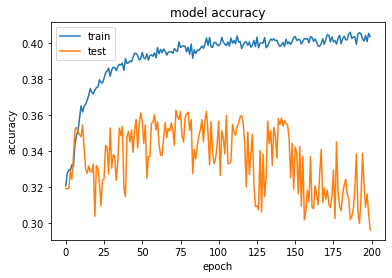

943/943 [==============================] - 1s 672us/step - loss: 1.9022 - accuracy: 0.3055


In [68]:
modelc = build_classification_model(x_train, y_train)
#預測test
pred_cy = modelc.predict(x_test)
evaluate_cy = modelc.evaluate(x_train, y_train,verbose = 1)

#預測train
pred_train_cy = modelc.predict(x_train)
evaluate_train_cy = modelc.evaluate(x_train, y_train,verbose = 1)

In [32]:
precision = precision_m(y_test, pred_cy)
recall = recall_m(y_test, pred_cy)
f1 = f1_m(y_test, pred_cy)
print(f'test preict: precision:{precision}, recall:{recall}, f1:{f1}')

#train
precision_train = precision_m(y_train, pred_train_cy)
recall_train = recall_m(y_train, pred_train_cy)
f1_train = f1_m(y_train, pred_train_cy)
print(f'train preict: precision:{precision_train}, recall:{recall_train}, f1:{f1_train}')

test preict: precision:0.5189588665962219, recall:0.10723771899938583, f1:0.1777459681034088
train preict: precision:0.5777778029441833, recall:0.12068165093660355, f1:0.19965989887714386


In [ ]:
precision = precision_m(a_test, pred_cy)
recall = recall_m(b_test, pred_cy)
f1 = f1_m(b_test, pred_cy)
print(f'test preict: precision:{precision}, recall:{recall}, f1:{f1}')

#train
precision_train = precision_m(b_train, pred_train_cy)
recall_train = recall_m(b_train, pred_train_cy)
f1_train = f1_m(b_train, pred_train_cy)
print(f'train preict: precision:{precision_train}, recall:{recall_train}, f1:{f1_train}')

In [28]:
pred_train_cy

array([[4.68244441e-02, 4.38872837e-02, 1.37019157e-02, ...,
        1.55138201e-03, 1.96551392e-03, 1.75769567e-01],
       [4.69640940e-02, 5.82754873e-02, 1.49188610e-02, ...,
        3.63635318e-03, 1.08202791e-03, 1.41477197e-01],
       [4.59947325e-02, 6.05438091e-02, 1.60161387e-02, ...,
        9.70593363e-04, 2.75882834e-04, 1.65083110e-01],
       ...,
       [1.23533374e-02, 1.10250302e-02, 1.96489762e-03, ...,
        6.31520379e-06, 4.77995677e-03, 3.00329149e-01],
       [2.41598040e-02, 3.39603201e-02, 1.31517155e-02, ...,
        1.54884846e-03, 4.51623549e-04, 3.19812208e-01],
       [3.69728878e-02, 3.66288163e-02, 1.01010418e-02, ...,
        3.96716548e-03, 2.12077680e-03, 1.83195651e-01]], dtype=float32)

In [69]:
def talos_regression_best(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='relu'))
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    model.compile(loss = 'mse', optimizer = params['optimizer'], metrics = ['mae'])
    out = model.fit(x_train, y_train,
                              epochs=params['epochs'],  
                              batch_size=params['batch_size'],
                              validation_split=0.1)
    return out,model

def build_regression_model(x, y):
    model = Sequential()
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='relu'))
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    model.compile(loss = 'mae', optimizer = 'SGD', metrics = ['mae'])
    model_result = model.fit(x, y,
                              epochs=200,  
                              batch_size=32,
                              validation_split=0.1)
    loss,mae = model.evaluate(x, y, verbose=1)
    print(mae)
    print('Test loss:', loss)
    print('Test accuracy:', mae)
    plt.plot(model_result.history['loss'])
    plt.plot(model_result.history['mae'])
    plt.plot(model_result.history['val_loss'])
    plt.plot(model_result.history['val_mae'])
    plt.title('model accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'mae','val_loss', 'val_mae'], loc='upper left') 
    plt.show()
    return model

In [71]:
p = {'optimizer': ['SGD', 'Adam'],
     'batch_size': [32,64,128],
     'epochs':[100,200,300]
    }


Epoch 1/200
849/849 [==============================] - 2s 2ms/step - loss: 0.0642 - mae: 0.0642 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 2/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 3/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 4/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 5/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 6/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 7/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 8/200
849/849 [==============================] - 1s 1ms/step - 

Epoch 62/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 63/200
849/849 [==============================] - 1s 2ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 64/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 65/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 66/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 67/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 68/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 69/200
849/849 [==============================] - 1s 1ms

Epoch 123/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 124/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 125/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 126/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 127/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 128/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 129/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 130/200
849/849 [==============================] 

849/849 [==============================] - 1s 2ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 184/200
849/849 [==============================] - 1s 2ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 185/200
849/849 [==============================] - 1s 2ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 186/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 187/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 188/200
849/849 [==============================] - 1s 2ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 189/200
849/849 [==============================] - 1s 1ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 190/200
849/849 [==============================] - 1s 1ms/step 

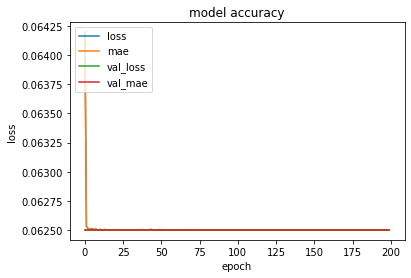

In [73]:
modelr = build_regression_model(x_train, y_train)

In [78]:
precision = precision_m(y_test, pred_cy)
recall = recall_m(y_test, pred_cy)
f1 = f1_m(y_test, pred_cy)
print(f'test preict: precision:{precision}, recall:{recall}, f1:{f1}')

#train
precision_train = precision_m(y_train, pred_train_cy)
recall_train = recall_m(y_train, pred_train_cy)
f1_train = f1_m(y_train, pred_train_cy)
print(f'train preict: precision:{precision_train}, recall:{recall_train}, f1:{f1_train}')

test preict: precision:0.5043409466743469, recall:0.04243027791380882, f1:0.07827523350715637
train preict: precision:0.5003709197044373, recall:0.04472514986991882, f1:0.08211088180541992


In [74]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [75]:
clf.predict([[2., 2.]])

array([1])

In [76]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

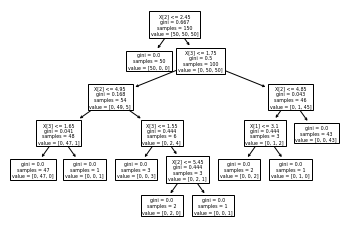

In [77]:
tree.plot_tree(clf)